In [192]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [193]:
df=pd.read_csv("D:\\shru\\Sem 5\\ML\\files\\car_evaluation.csv")

In [194]:
df

,Buying,Maintained,Doors,Capacity,Lagboot,Safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Buying      1728 non-null   object
 1   Maintained  1728 non-null   object
 2   Doors       1728 non-null   object
 3   Capacity    1728 non-null   object
 4   Lagboot     1728 non-null   object
 5   Safety      1728 non-null   object
 6   Class       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [196]:
percnan=pd.DataFrame([(col,df[col].isna().mean()*100)for col in df],columns=["Features","percentage"])

In [197]:
percnan

,Features,percentage
0,Buying,0.0
1,Maintained,0.0
2,Doors,0.0
3,Capacity,0.0
4,Lagboot,0.0
5,Safety,0.0
6,Class,0.0


In [198]:
print(df['Buying'].unique())
print(df['Maintained'].unique())
print(df['Doors'].unique())
print(df['Capacity'].unique())
print(df['Lagboot'].unique())
print(df['Safety'].unique())
print(df['Class'].unique())

['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
['2' '3' '4' '5more']
['2' '4' 'more']
['small' 'med' 'big']
['low' 'med' 'high']
['unacc' 'acc' 'vgood' 'good']


In [199]:
df['Maintained'].replace(to_replace = ['low', 'med','high','vhigh'], value =[1,2,3,4], inplace=True)
df['Buying'].replace(to_replace = ['low', 'med','high','vhigh'], value =[1,2,3,4], inplace=True)
df['Doors'].replace(to_replace = ['5more'], value =[5], inplace=True)
df['Capacity'].replace(to_replace = ['more'], value =[5], inplace=True)
df['Lagboot'].replace(to_replace = ['small', 'med','big'], value =[1,2,3], inplace=True)
df['Safety'].replace(to_replace = ['low', 'med','high'], value =[1,2,3], inplace=True)
df['Class'].replace(to_replace = ['unacc', 'acc','good','vgood'], value =[1,2,3,4], inplace=True)


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Buying      1728 non-null   int64 
 1   Maintained  1728 non-null   int64 
 2   Doors       1728 non-null   object
 3   Capacity    1728 non-null   object
 4   Lagboot     1728 non-null   int64 
 5   Safety      1728 non-null   int64 
 6   Class       1728 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 94.6+ KB


In [201]:
df

,Buying,Maintained,Doors,Capacity,Lagboot,Safety,Class
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,1,3,1
3,4,4,2,2,2,1,1
4,4,4,2,2,2,2,1
...,...,...,...,...,...,...,...
1723,1,1,5,5,2,2,3
1724,1,1,5,5,2,3,4
1725,1,1,5,5,3,1,1
1726,1,1,5,5,3,2,3


In [202]:
X=df.drop(['Class'],axis=1)
Y=df["Class"]

In [203]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [204]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [205]:
pred=knn.predict(X_test)

In [206]:
print("Accuracy:",accuracy_score(y_test,pred))

Accuracy: 0.9682080924855492


In [207]:
neighbors = np.arange(1,90)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [208]:
for i,k in enumerate(neighbors):
    #setup a knn classifier k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train,y_train)
    
    #Compare accuracy on the training set
    train_accuracy[i]=knn.score(X_train,y_train)
    
    #compute accuracy on the test set
    test_accuracy[i]=knn.score(X_test,y_test)

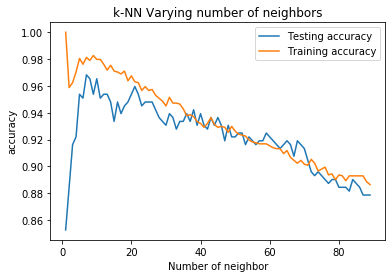

In [209]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors,test_accuracy,label='Testing accuracy')
plt.plot(neighbors,train_accuracy,label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbor')
plt.ylabel('accuracy')
plt.show()